## Author- Fazal Diyan

# Exploratory Data Analysis - Retail

#### -Perform ‘Exploratory Data Analysis’ on the provided dataset ‘SampleSuperstore’
#### -You are the business owner of the retail firm and want to see how your company is performing.
#### -You are interested in finding out the weak areas where you can work to make more profit. What all business problems you can derive by looking into the data?

In [1]:
# importing neccersary libraries

import pandas as pd
from scipy import stats 
import seaborn as sns
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

##### Reading Data

In [2]:
retail = "./SampleSuperstore.csv"
df = pd.read_csv(retail)
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [3]:
df.tail()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.248,3,0.2,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.960,2,0.0,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.576,2,0.2,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.600,4,0.0,13.3200
9993,Second Class,Consumer,United States,Westminster,California,92683,West,Office Supplies,Appliances,243.160,2,0.0,72.9480


In [4]:
df.shape

(9994, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [6]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [7]:
df.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [8]:
df.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

##### Cleaning the data

In [9]:
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [10]:
df.duplicated().sum()

17

In [11]:
# Droping the Duplicate Values
df.drop_duplicates(inplace = True)

In [12]:
# Removing unnecessary columns
df = df.drop(['Country','Postal Code'],axis=1)

             Sales  Quantity  Discount    Profit
Sales     1.000000  0.200722 -0.028311  0.479067
Quantity  0.200722  1.000000  0.008678  0.066211
Discount -0.028311  0.008678  1.000000 -0.219662
Profit    0.479067  0.066211 -0.219662  1.000000


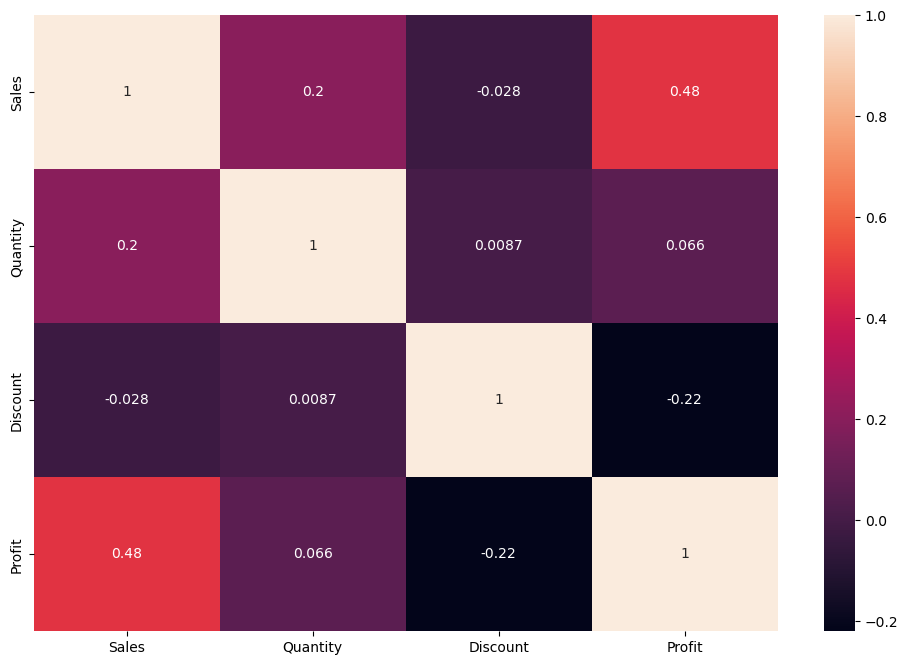

In [13]:
f,ax = plt.subplots(figsize=(12,8))
corr_mat = df.corr()
sns.heatmap(corr_mat,xticklabels=corr_mat.columns,yticklabels=corr_mat.columns,annot=True)
print(corr_mat)

<AxesSubplot:>

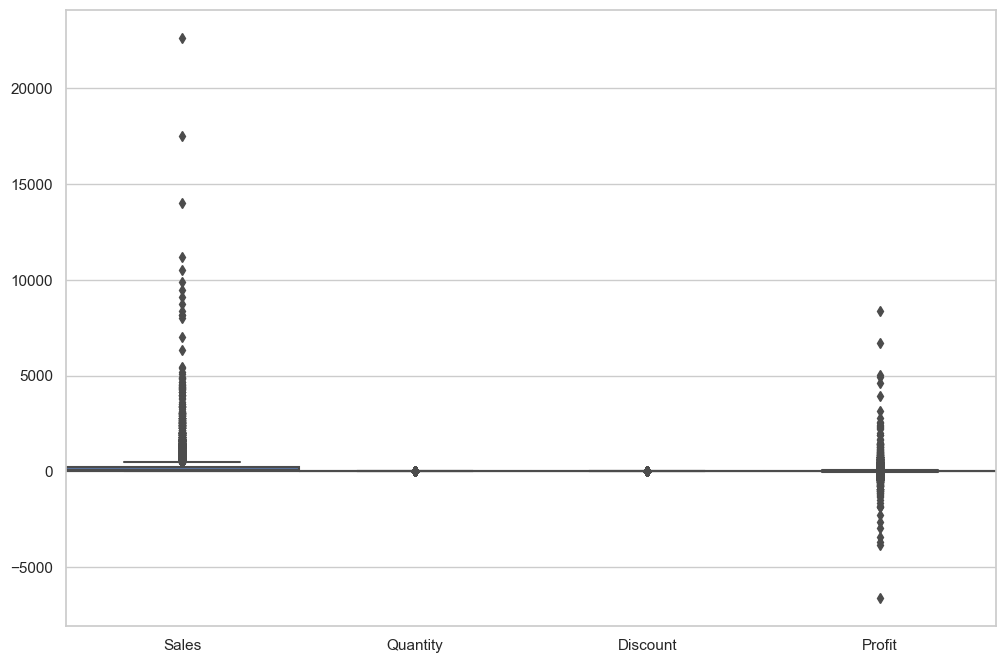

In [14]:
plt.figure(figsize=(12,8))
df_val = df[['Sales','Quantity','Discount','Profit']].copy()
sns.set_theme(style="whitegrid")
sns.boxplot(data=df_val,width=1)

In [15]:
#Removal of Outliers
df_val =df_val[(np.abs(stats.zscore(df_val)) < 3).all(axis=1)]

<AxesSubplot:>

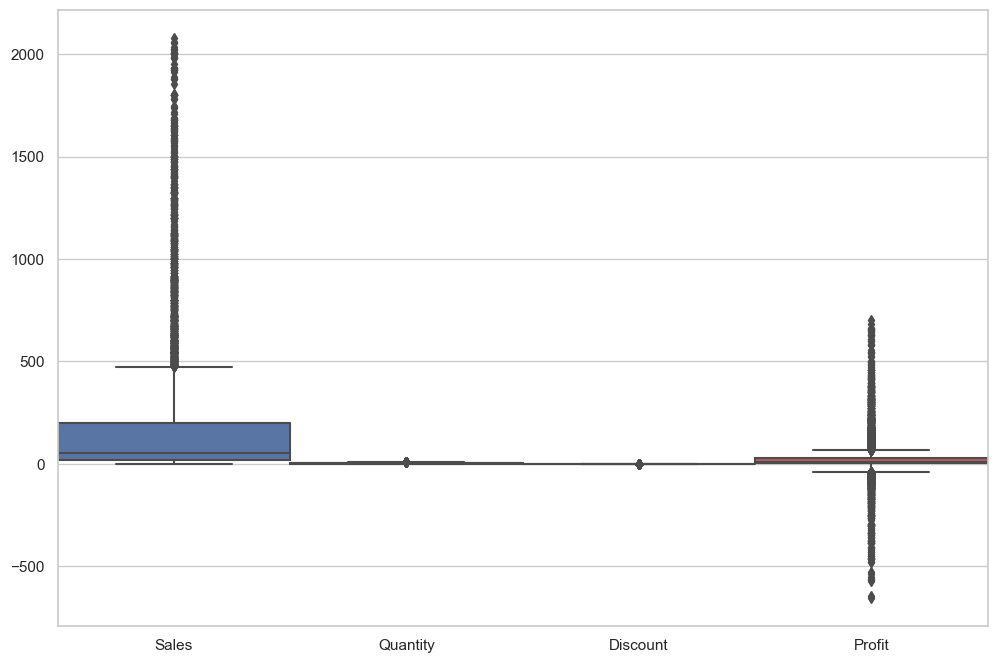

In [16]:
plt.figure(figsize=(12,8))
sns.set_theme(style="whitegrid")
sns.boxplot(data=df_val,width=1)

##### Exploratory Data Analysis

<AxesSubplot:xlabel='Region', ylabel='count'>

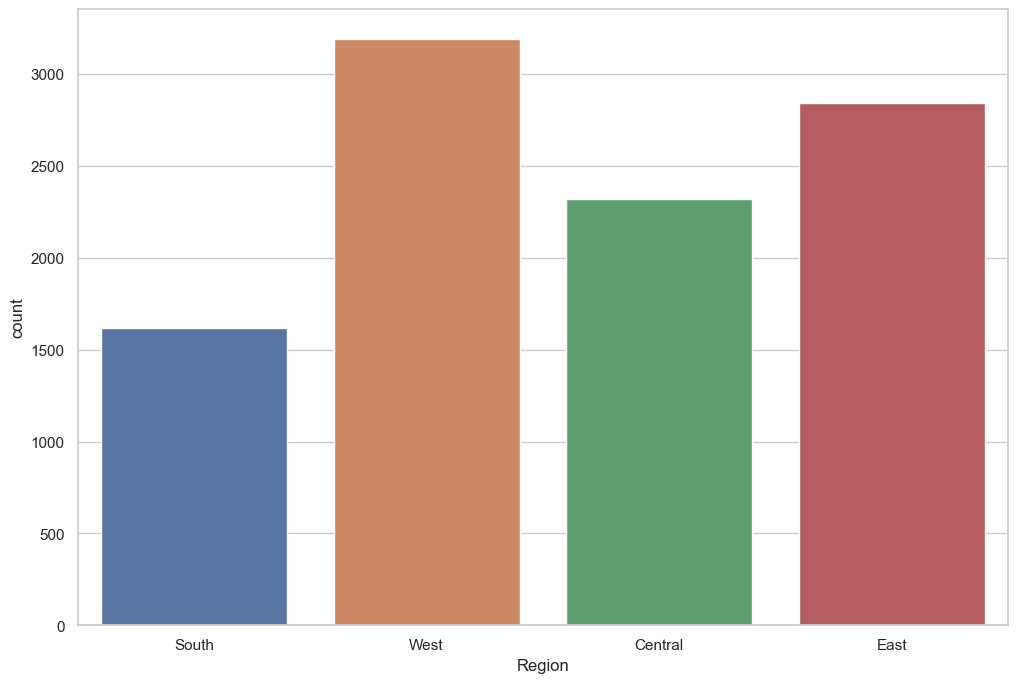

In [17]:


plt.figure(figsize=(12,8))
sns.countplot(x='Region',data=df)



<AxesSubplot:xlabel='Ship Mode', ylabel='count'>

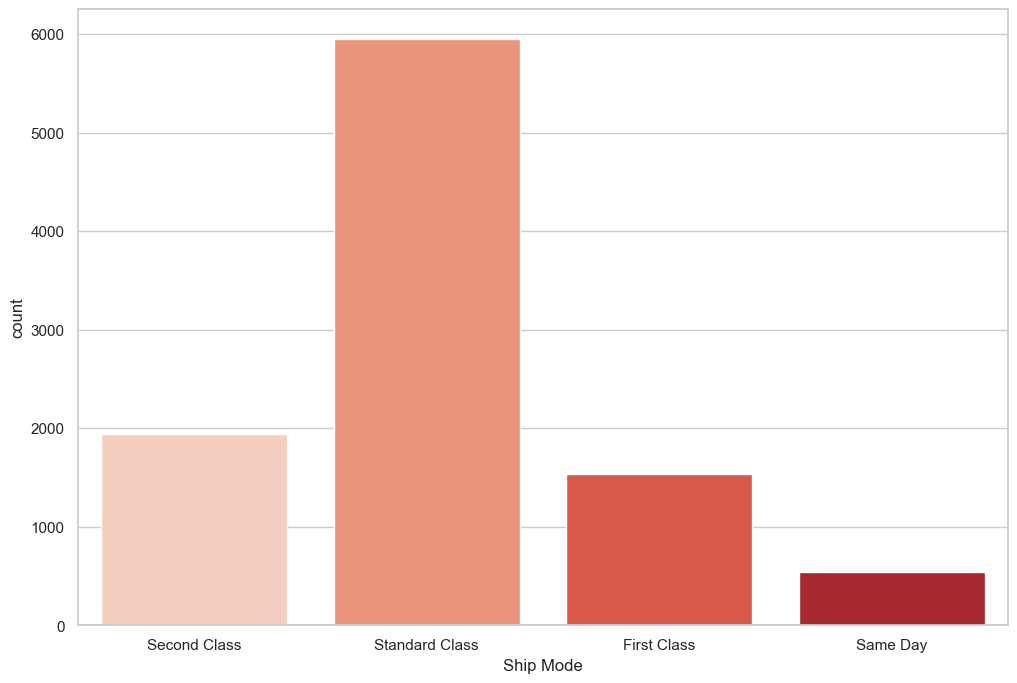

In [18]:
plt.figure(figsize=(12,8))
sns.countplot(x='Ship Mode',data=df,palette='Reds')

<AxesSubplot:xlabel='Category', ylabel='count'>

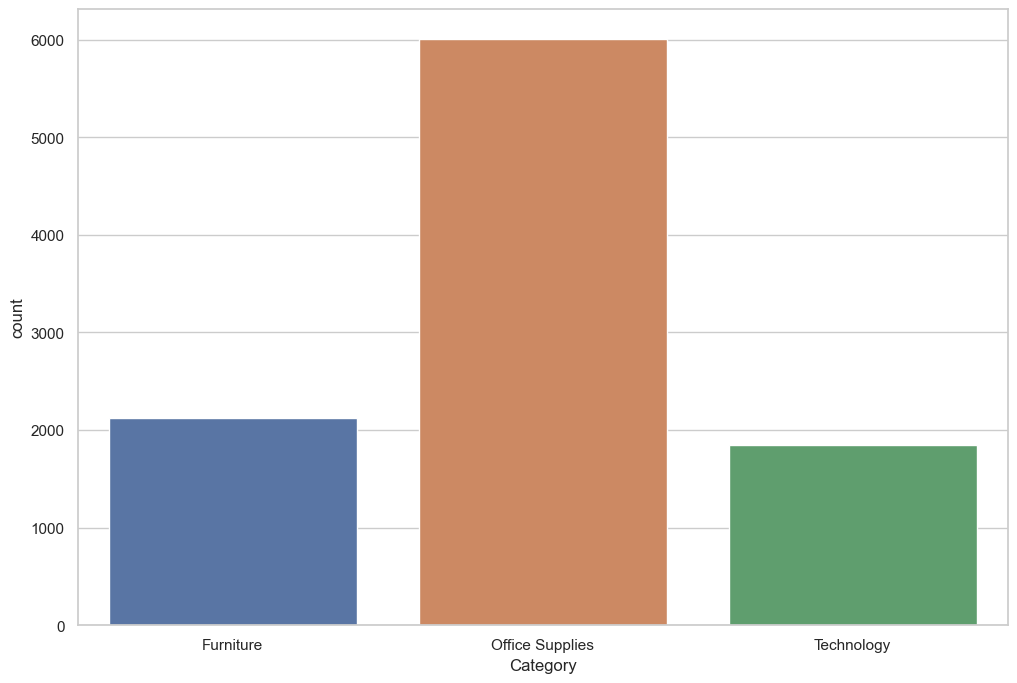

In [19]:


plt.figure(figsize=(12,8))
sns.countplot(x='Category',data=df)



C:\Users\dell\AppData\Local\Temp\ipykernel_10904\3366166409.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby('Category')['Sales', 'Profit'].sum().plot.bar()


<AxesSubplot:xlabel='Category'>

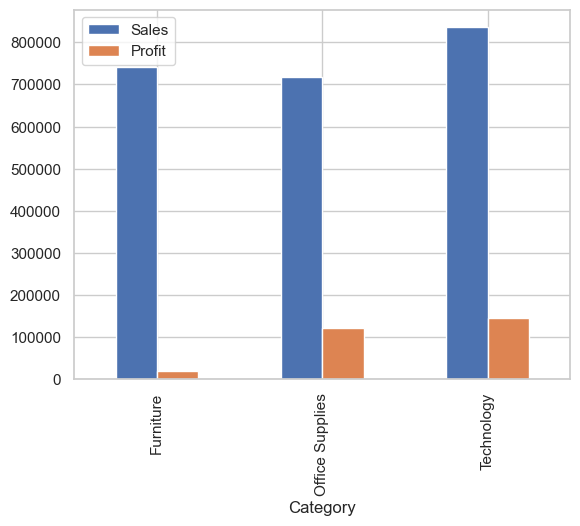

In [20]:


df.groupby('Category')['Sales', 'Profit'].sum().plot.bar()



<AxesSubplot:xlabel='Sub-Category'>

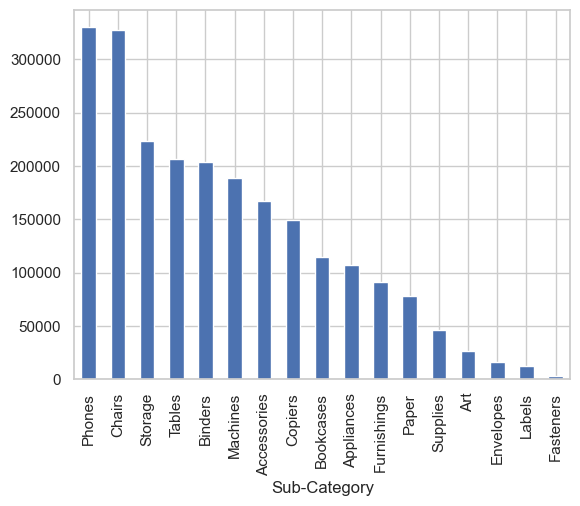

In [21]:


df.groupby('Sub-Category')['Sales'].sum().sort_values(ascending=False).plot.bar()



(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'California'),
  Text(1, 0, 'New York'),
  Text(2, 0, 'Texas'),
  Text(3, 0, 'Pennsylvania'),
  Text(4, 0, 'Washington'),
  Text(5, 0, 'Illinois'),
  Text(6, 0, 'Ohio'),
  Text(7, 0, 'Florida'),
  Text(8, 0, 'Michigan'),
  Text(9, 0, 'North Carolina'),
  Text(10, 0, 'Arizona'),
  Text(11, 0, 'Virginia'),
  Text(12, 0, 'Georgia'),
  Text(13, 0, 'Tennessee'),
  Text(14, 0, 'Colorado'),
  Text(15, 0, 'Indiana'),
  Text(16, 0, 'Kentucky'),
  Text(17, 0, 'Massachusetts'),
  Text(18, 0, 'New Jersey'),
  Text(19, 0, 'Oregon')])

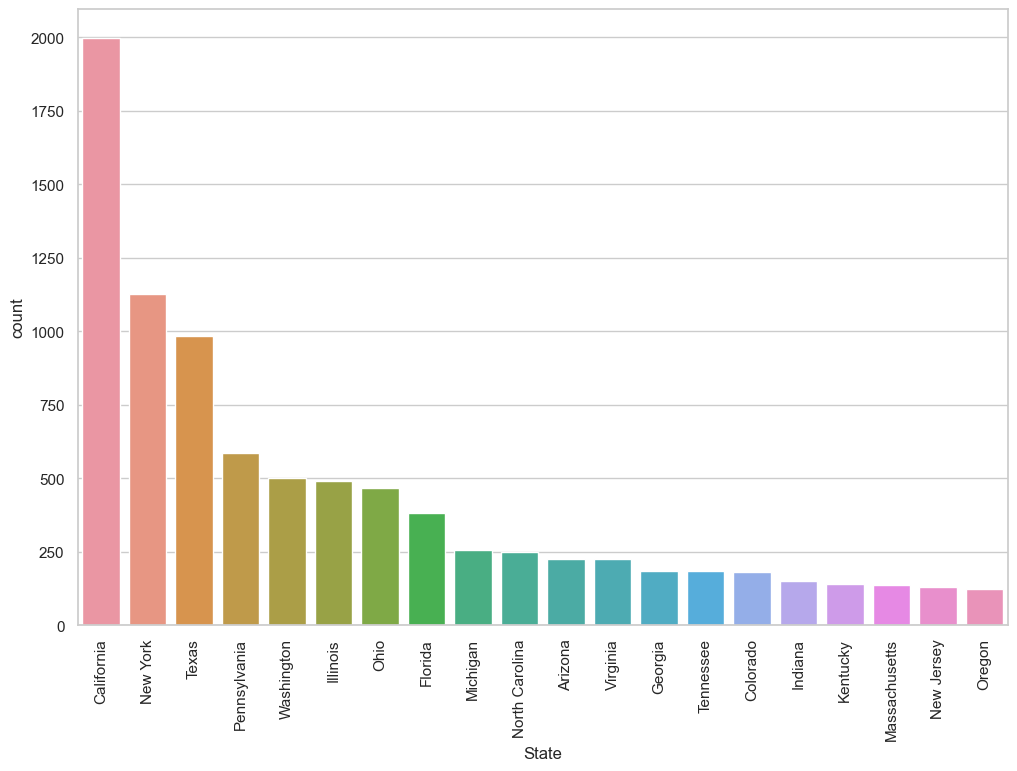

In [22]:
plt.figure(figsize=(12,8))
sns.countplot(x=df['State'],order=(df['State'].value_counts().head(20)).index)
plt.xticks(rotation=90)

###### Maximum number of transaction are from people from "California" followed by "New York".